# Assignment Information

- Assignment: Homework 4
- Author: Charles Hoyt
- Due: 2016 May 27
- Language: R
- Posted: https://github.com/cthoyt/notebooks/blob/master/bit/abi/AbiHomework4.ipynb

# Exercise 1

The expression of gene EGR1 is measured with sample mean 4 and sample standard deviation of 0.7 using 5 data points. We assume data to be drawn from a normal distribution N(), which is unknown.

a) Compute the standard error of the mean (1 point + 1 bonus point

In [1]:
x_bar = 4
s = 0.7
n = 5

se = s / sqrt(n)
se

[1] 0.3130495

b) Based on the sample mean and the standard error we ask, in which range the expectation value  will lie with high probability, given sample size
n=5. In particular, the 1 –  confidence interval for  is given by:

Here t1(n1) denotes the 1 –  quantile of a t-distribution with n – 1 2
degrees of freedom.
Compute the 95% confidence interval for the expectation value of EGR1 measurements. Tip: use R-function qt to compute t-distribution quantiles (2 points + 1 bonus point)

In [2]:
alpha = 1 - 0.95
t = qt(p=(1 - alpha / 2), df=(n-1))
t

[1] 2.776445

In [3]:
lower = x_bar - t * se
upper = x_bar + t * se

c(lower, upper)

[1] 3.130835 4.869165

length of CI:
2 * t * s / sqrt(n)

target:

c) Assume that in order to get a more confident estimate of the mean we would like to half the size of the confidence interval. Roughly, how many data points would we need? (2 points + 1 bonus point)

In [4]:
t * se

[1] 0.8691648

Scan through all n's until confidence interval is half of before

In [5]:
i = 6 
repeat {
    lci = qt(0.975, df=(i-1)) * s / sqrt(i)
    
    if (lci * 2 < t * se) {
        print(i)
        print(lci)
        break
    }
    i = i + 1
}

[1] 13
[1] 0.4230058


# Exercise 2

Here, let us consider the gene expression data of the Golub data set. It is part of the multtest package of R and can be loaded using library(multtest);data(golub).
It contains gene expression data of 3051 genes from 38 tumor mRNA samples. Read the help information of R for more information on this data set. The expression data is organized in a matrix where rows correspond to genes and columns to samples. The tumor class of the columns is given in the vector golub.cl. The names of the genes (rows) are given in golub.gnames.

a) Calculate the mean and variance of all pooled expression data of the golub matrix. Explain the result. (Hint: You may want to check the help information) (2 points + 1 bonus point)

In [6]:
install.packages("multtest")
#library(multtest)
#data(golub)

Warning message:
: package ‘multtest’ is not available (for R version 3.3.0)

It seems that multtest doesn't exist anymore. Instead, I will explain what I would do if I had a data-matrix of $n$ genes by $m$ cell lines, with categorical labels $1 \dots k$ for the $m$ cell lines..


1. apply(golub, 1, mean) calculates mean across all classes

## Exercise 2B

Determine the means and standard deviations of the expression level for every gene for the classes ALL and AML.

### Exercise 2BI
i. golub.cl identifies the tumor class by 0 for acute lymphoblastic leukemia (ALL) and 1 for acute myeloid leukemia (AML). Convert golub.cl to a vector of factors golub.fac with levels ALL and AML. (You can use golub.fac instead of golub.cl in the following to make your code clearer.)

1. filter columns by golub[colub.fac == AML] for one set and golub[colub.fac == ALL] for other set.
2. calculate mean over horizontal axis using apply(golub[golub.cl == AML], 1, mean) or similarly the variance

### Excercise 2BII
Determine the 5 genes with the largest mean expression for AML and ALL.

For each category's mean tables:

1. sort each result by values
2. then slice the index by 1:5 

### Excercise 2BIII

Determine the 5 genes with the largest mean expression for AML and ALL that are known oncogenes. (Hint: The oncogene information is given as part of the gene name)

1. calculate oncogene/tumor suppressor/uninteresting labels based on oncogene information
2. slice only oncogene rows out of data frame of mean expression for both AML and LL from 2BI
3. sort by values

### Exercise BIV
Determine the 5 genes with the largest difference in expression between the two classes.
and write their names, means, and standard deviations to a csv file. (6 points + 2 bonus points)

1. use unsorted calculations from 2BI, take a two-sample pooled t test. 
2. rank by highest minus-log-p value
3. slice top 1:5 from index
4. use this to slice original data out of mean and standard deviation data frames from 2BI
5. output to csv with write.table


## Exercise 2C
c) For the moment, we are interested in the expression data of the single
gene in row 1042 (CCND3 Cyclin D3).

### Exercise 2CI
i. Make a boxplot for the expression data of this gene grouped by tumor class.

1. slice out row
2. group data by each factor and calculate mean with something like mean(golub[row, golub.fac==ALL)
3. boxplot each data together

### Exercise 2CII
ii. Make Q-Q plots for ALL and AML comparing the distributions to a normal distribution. Use qqline to add a theoretical normal distribution to the plot.

### Exercise 2CIII
iii. We want to investigate whether the means of two sample distributions are different. To this end, assume the distributions for ALL and AML are essentially normal. Which test/test variant should we apply? Use R to perform the test and interpret the result.

The appropriate test for determining if the means ot two sample distributions are different is the two-sample t-test, if you can assume the distributions or normal.

### Exercise 2CIIV
iv. Perform an appropriate non-parametric test as an alternative to the test performed in iv. Do the conclusions differ?

As an alternative non-parametric approach, the Mann-Whitney-Wilcoxon rank-sum test can be performed. The test makes no assumption and converts the data to ranks, so the conclusions should be similar, but this is a worse test because it doesn't use the knowledge that can be acquired by a test like the KS Test, which can say how normal our distibutions are, and allow a more specific and meaningful test like two-sample t test to be performed

(6 points + 2 bonus points)

## Exercise 2D

d) Perform Student t-tests for all genes comparing the distributions for ALL
and AML.

### Exercise 2DI
i. How many genes show significant differences of the mean at the p=0.05 level?

### Exercise 2DI
ii. Here, we performed more than 3000 tests. If we assume that all genes for both classes were actually drawn independently from identical distributions (i.e., in each case the null hypothesis is true), how often can you expect to falsely reject the null hypothesis, i.e., commit a type I error, given a p-level of 0.05 just by chance in 3000 t-tests?

3000 * 0.05 = 150


### Exercise 2DIII
iii. Use the Bonferroni correction (you can read up on it on Wikipedia, for instance) to adjust the p=0.05 level. How many genes show significant differences now?

Bonferroni correction is one way to correct for multiple hypotheses. This is necessary when many statistical tests are performed on the same data set, because there is a probability related to the number of tests and the significance cutoff that some will be significant by chance. 

Bonferroni correction is simple. It involves dividing the desired alpha by the number of tests being performed. A test's p-value must be smaller than this more stringent cutoff to be considered significant.


(6 points + 2 bonus points)

# Exercise 3

Implement the permutation test for testing the significance of the correlation between species richness and lake area. Choose N=1000 permutations. Tip: sample(1:n) generates a random permutation of n numbers. (4 points + 1 bonus point)

| Species Richness | Lake Area | 
| --- | --- |
| 32 | 2.0 |
|29 | 0.9 |
|35 | 3.1 |
|36 | 3.0 |
|41 | 3.0 |

In [7]:
richness = c(32, 29, 35, 36, 41)
area = c(2.0, 0.9, 3.1, 3.0, 3.0)

real_corr = cor(richness, area)
real_corr

[1] 0.839905

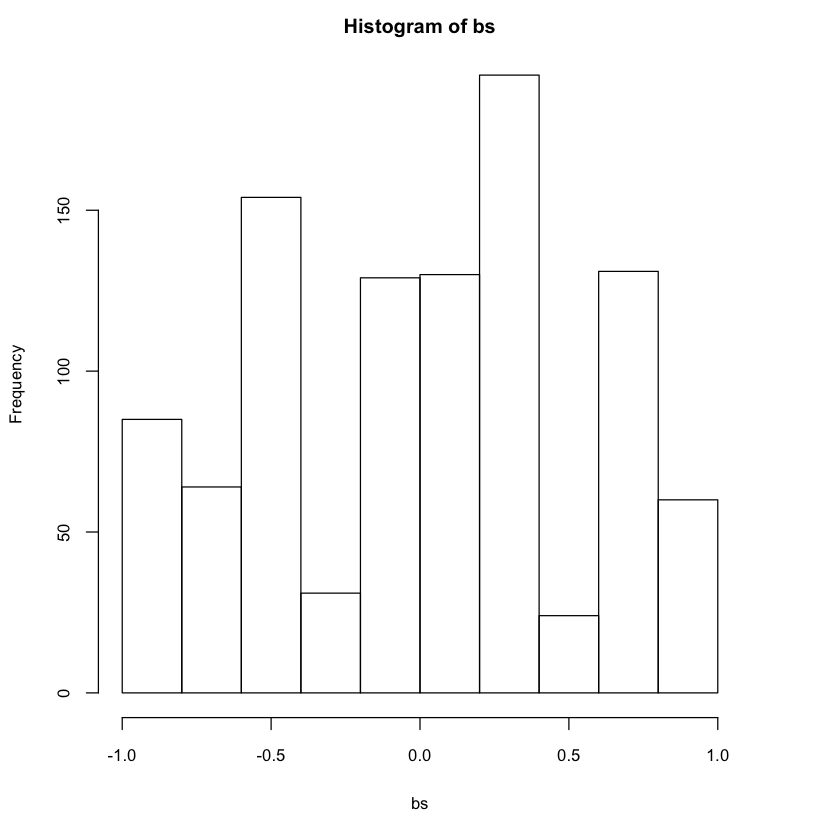

In [8]:
n_perm = 1000
bs = vector(length=n_perm)
for (i in 1:n_perm) { 
    p_area = area[sample(1:length(area))]
    p_corr = cor(richness, p_area)
    bs[i] = p_corr
}

hist(bs)

Report P-value for old-school and Minus-Log P-Value for interpretabity

In [9]:
p = sum(bs >= real_corr) / n_perm
mlp = -log(p)

c(p, mlp)

[1] 0.060000 2.813411